In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;
from sklearn.preprocessing import normalize;
from sklearn.model_selection import train_test_split

### 1) Загрузите прилагающийся датасет credit_data.

In [123]:
data = pd.read_csv(r'credit_data.csv',delimiter=',')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [124]:
data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [125]:
target = data['Risk']
data = data.drop(['Risk','Unnamed: 0', 'Purpose'], axis=1)

### 2) Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.

In [126]:
target = target.map({"good":1,"bad":0});

In [93]:
data['Saving accounts'] = data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
data['Checking account'] = data['Checking account'].map({"little":1,"moderate":2,"rich":3 });
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)
data['Sex'] = data['Sex'].map({"male":1, "female":0})
data['Housing'] = data['Housing'].map({"own":0, "free":1, "rent":2 })

In [127]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,NaN,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,NaN,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24
...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12
996,40,male,3,own,little,little,3857,30
997,38,male,2,own,little,NaN,804,12
998,23,male,2,free,little,little,1845,45


### 3) Выведите информацию о количественных параметрах датасета;

In [128]:
data.shape, target.shape

((1000, 8), (1000,))

In [129]:
new_data = pd.get_dummies(data)
new_data.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
0,67,2,1169,6,0,1,0,1,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,0,0,1,0,1,0,0,0,0,1,0
2,49,1,2096,12,0,1,0,1,0,1,0,0,0,0,0,0
3,45,2,7882,42,0,1,1,0,0,1,0,0,0,1,0,0
4,53,2,4870,24,0,1,1,0,0,1,0,0,0,1,0,0


In [130]:
new_data.shape

(1000, 16)

### 4) Разделите эти данные на тестовую и обучающую выборки;

In [131]:
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.2)

### 5) Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

In [132]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

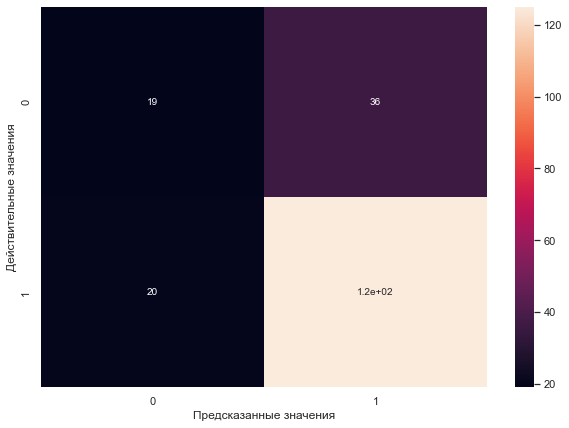

In [133]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(10,7))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения');

### 6) Оцените полученную модель с помощью метрик.

In [134]:
metrics.accuracy_score(y_test, y_pred),\
metrics.precision_score(y_test, y_pred),\
metrics.recall_score(y_test, y_pred)

(0.72, 0.7763975155279503, 0.8620689655172413)

### 7) Понизьте размерность данных с помощью метода главных компонент.

In [135]:
X = normalize(new_data);
x_PCA = PCA(n_components=2).fit_transform(X,2);
x_PCA.shape

(1000, 2)

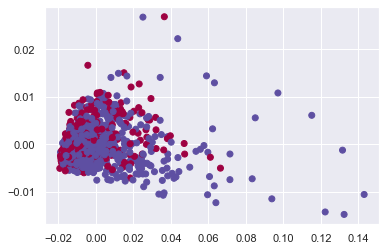

In [136]:
plt.scatter(x_PCA[:,0], x_PCA[:,1], c=target, cmap='Spectral');

### 8) Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x_PCA, target, test_size=0.2)

In [138]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

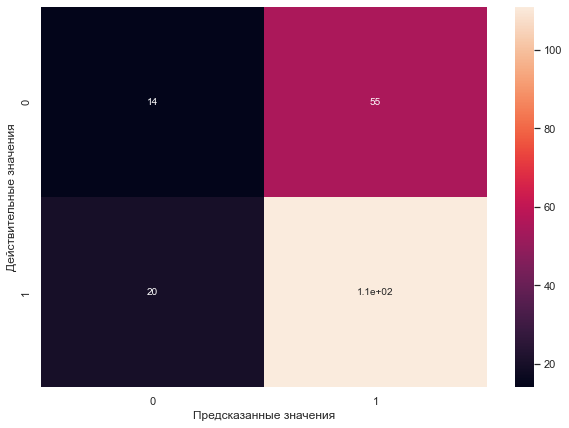

In [139]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(10,7))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения');

In [140]:
metrics.accuracy_score(y_test, y_pred),\
metrics.precision_score(y_test, y_pred),\
metrics.recall_score(y_test, y_pred)

(0.625, 0.6686746987951807, 0.8473282442748091)

### 9) Постройте график зависимости точности модели от размерности данных.

In [141]:
results = pd.DataFrame(columns=["N_attributes", "accuracy", "precision","recall"])

In [142]:
for N in range(2, new_data.shape[1]):
    X = normalize(new_data);
    x_PCA = PCA(n_components=2).fit_transform(X,N);
    X_train, X_test, y_train, y_test = train_test_split(x_PCA, target, test_size=0.2)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = pd.DataFrame(
        [[
            
            N,
            metrics.accuracy_score(y_test, y_pred),
            metrics.precision_score(y_test, y_pred),
            metrics.recall_score(y_test, y_pred)
        ]],
        columns=results.columns
    )
    results = pd.concat([results, res], ignore_index=True)

In [143]:
results

,N_attributes,accuracy,precision,recall
0,2,0.66,0.765101,0.77551
1,3,0.68,0.75641,0.819444
2,4,0.705,0.75974,0.841727
3,5,0.68,0.748466,0.841379
4,6,0.635,0.685185,0.834586
5,7,0.65,0.727811,0.836735
6,8,0.655,0.717949,0.817518
7,9,0.675,0.754839,0.8125
8,10,0.705,0.762195,0.862069
9,11,0.645,0.711538,0.810219


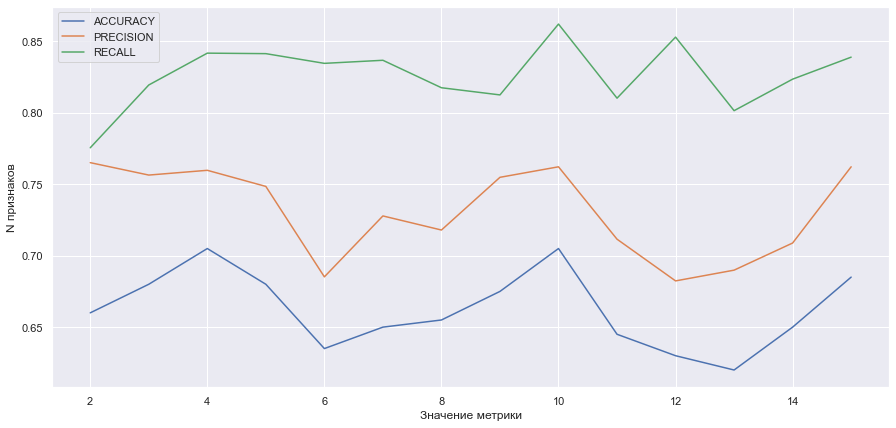

In [144]:
plt.figure(figsize=(15,7))
plt.plot(results.N_attributes, results.accuracy, label="ACCURACY");
plt.plot(results.N_attributes, results.precision, label="PRECISION");
plt.plot(results.N_attributes, results.recall, label="RECALL");
plt.legend();
plt.ylabel('N признаков')
plt.xlabel('Значение метрики');

### 10) Сделайте вывод о применимости модели.